# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score


# Loading and splitting Iris dataset

In [6]:
iris = pd.read_csv("iris.csv")
x = iris.iloc[:, 0:4].values
y = iris.iloc[:,4].values
y = LabelEncoder().fit_transform(y)
#setosa     ==> 0
#versicolor ==> 1
#virginica  ==> 2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=85)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(127, 4)
(23, 4)
(127,)
(23,)


In [7]:
lda = LDA(n_components=2)
lda.fit(x_train, y_train)

prediction = lda.predict(x_test)
print("Accuracy = " , accuracy_score(y_test,prediction)*100 , "%")

Accuracy =  95.65217391304348 %


# Implementing LDA

In [20]:
class linearDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.w1 = None
        self.w2 = None
        self.w3 = None
        self.linear_decremination = None
        
    def fit(self,x_t,y_t):
        n_features = x_t.shape[1]
        class_labels = np.unique(y_t)
        
        mean = np.mean(x_t,axis=0)
        s_W = np.zeros((n_features,n_features))
        s_b = np.zeros((n_features,n_features))
        
        for label in class_labels:
            xc = x_t[y_t==label]
            mean_c = np.mean(xc, axis=0)
            s_w = 0
            s_w += (xc - mean_c).T.dot(xc - mean_c)
            nc = xc.shape[0]
            mean_difference = (mean_c - mean).reshape(n_features, 1)
            s_b += nc * mean_difference.dot(mean_difference.T)
        
            eigen_value = np.linalg.inv(s_w).dot(s_b)
            eigenValues, eigenVectors = np.linalg.eig(eigen_value)
            eigenVectors = eigenVectors.T
            reverse_sorting = np.argsort(abs(eigenValues))[::-1]
            eigenVectors = eigenVectors[reverse_sorting]
            eigenValues = eigenValues[reverse_sorting]
            self.linear_decremination = eigenVectors[0:self.n_components]
            
        #print("Linear_Discremenant_1\n{}\nLinear_Discremenant_2\n{}".format(self.linear_decremination[0].real, self.linear_decremination[1].real))
        
        b = np.arange(150).reshape(150,1)
        for i in range(150):
            for z in range(1):
                b[i][0] = 1
        
        x_t1 = x        
        x_t1 = np.append(x_t1, b, axis=1)
        for i in range(50,150):
            for j in range(5):
                x_t1[i][j] = -1 * x_t1[i][j]
                
        self.w1 = np.linalg.inv(x_t1.T.dot(x_t1)).dot(x_t1.T.dot(b))
        
        ###############################################################
        
        x_t2 = x
        x_t2 = np.append(x_t2, b, axis=1)
        for i in range(50):
            for j in range(5):
                x_t2[i][j] = -1 * x_t2[i][j]
        
        for i in range(100,150):
            for j in range(5):
                x_t2[i][j] = -1 * x_t2[i][j]
        
        self.w2 = np.linalg.inv(x_t2.T.dot(x_t2)).dot(x_t2.T.dot(b))
        
        ################################################################
        
        x_t3 = x
        x_t3 = np.append(x_t3, b, axis=1)

        for i in range(100):
            for j in range(5):
                x_t3[i][j] = -1 * x_t3[i][j]
        
        self.w3 = np.linalg.inv(x_t3.T.dot(x_t3)).dot(x_t3.T.dot(b))
        
        
    def transform(self,x):
        return np.dot(x, self.linear_decremination.T)
    
    def predict(self,test):
        count = 0
        c = 0
        predicts = []
        for n in test:
            e1 = self.w1[0]*n[0] + self.w1[1]*n[1] + self.w1[2]*n[2] + self.w1[3]*n[3] + self.w1[4]
            e2 = self.w2[0]*n[0] + self.w2[1]*n[1] + self.w2[2]*n[2] + self.w2[3]*n[3] + self.w2[4]
            e3 = self.w3[0]*n[0] + self.w3[1]*n[1] + self.w3[2]*n[2] + self.w3[3]*n[3] + self.w3[4]
            
            if e1 > 0 and e2 < 0 and e3 < 0:
                predicts.append(0)
                if y_test[c] == 0:
                    count += 1
                else:
                    print(n, " Wrong Classification!!!")
            
            elif e1 < 0 and e2 > 0 and e3 < 0:
                predicts.append(1)
                if y_test[c] == 1:
                    count += 1
                else:
                    print(n, " Wrong Classification!!!")
                
            elif e1 < 0 and e2 < 0 and e3 > 0:
                predicts.append(2)
                if y_test[c] == 2:
                    count += 1
                else:
                    print(n, " Wrong Classification!!!")
                
            elif e1 < 0 and e2 < 0 and e3 < 0:
                print(n," New classification")
                predicts.append(1)
                if y_test[c] == 1:
                    count += 1
                else:
                    print(n, " Wrong Classification!!!")
                
            else:
                print(n," Undetermined sample")
                predicts.append(2)
                if y_test[c] == 2:
                    count += 1
                else:
                    print(n, " Wrong Classification!!!")
            
            c += 1
        
        predicts = np.array(predicts)
        
        return count/test.shape[0]
    
        
        

[6.3 2.5 5.  1.9]  Undetermined sample
[5.6 3.  4.1 1.3]  New classification
[5.9 3.2 4.8 1.8]  Wrong Classification!!!
[6.4 2.9 4.3 1.3]  New classification
[4.5 2.3 1.3 0.3]  Undetermined sample
[4.5 2.3 1.3 0.3]  Wrong Classification!!!

Accuracy =  91.30434782608695 %


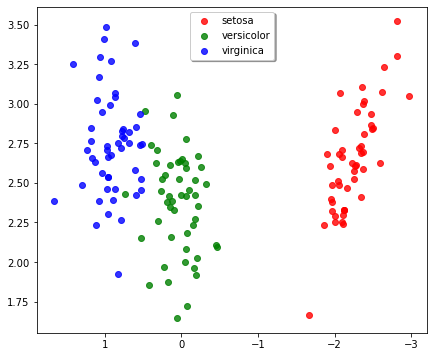

In [21]:
classifier = linearDA(2)
classifier.fit(x_train, y_train)
X = classifier.transform(x)
prediction = classifier.predict(x_test)
print("\nAccuracy = ", prediction*100, "%")

plt.figure(figsize=[7,6])
colors = ['red', 'green', 'blue']
for color, i, target_name in zip(colors, [0, 1, 2], ["setosa","versicolor","virginica"]):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, color=color, label=target_name)

plt.legend(loc='upper center', shadow=True, scatterpoints=1)
plt.gca().invert_xaxis()
plt.show()


>## Built in LDA is more accurate than our implementation of LDA
>>### Built in LDA accuracy = 95.65217391304348 %
>>
>>### Our LDA accuracy = 91.30434782608695 %